Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000828±2.31e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000829±1.88e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000805±1.91e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000833±2.01e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.00814±0.000387

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000811±2.12e-5

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000471±3.83e-6

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000461±6.36e-6

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.00437±0.000278

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.000845±9.82e-6

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.00046±4.97e-6

Estimated linear fit: f(delta_cond) = a*conc with
 a = 0.0082±0.000389



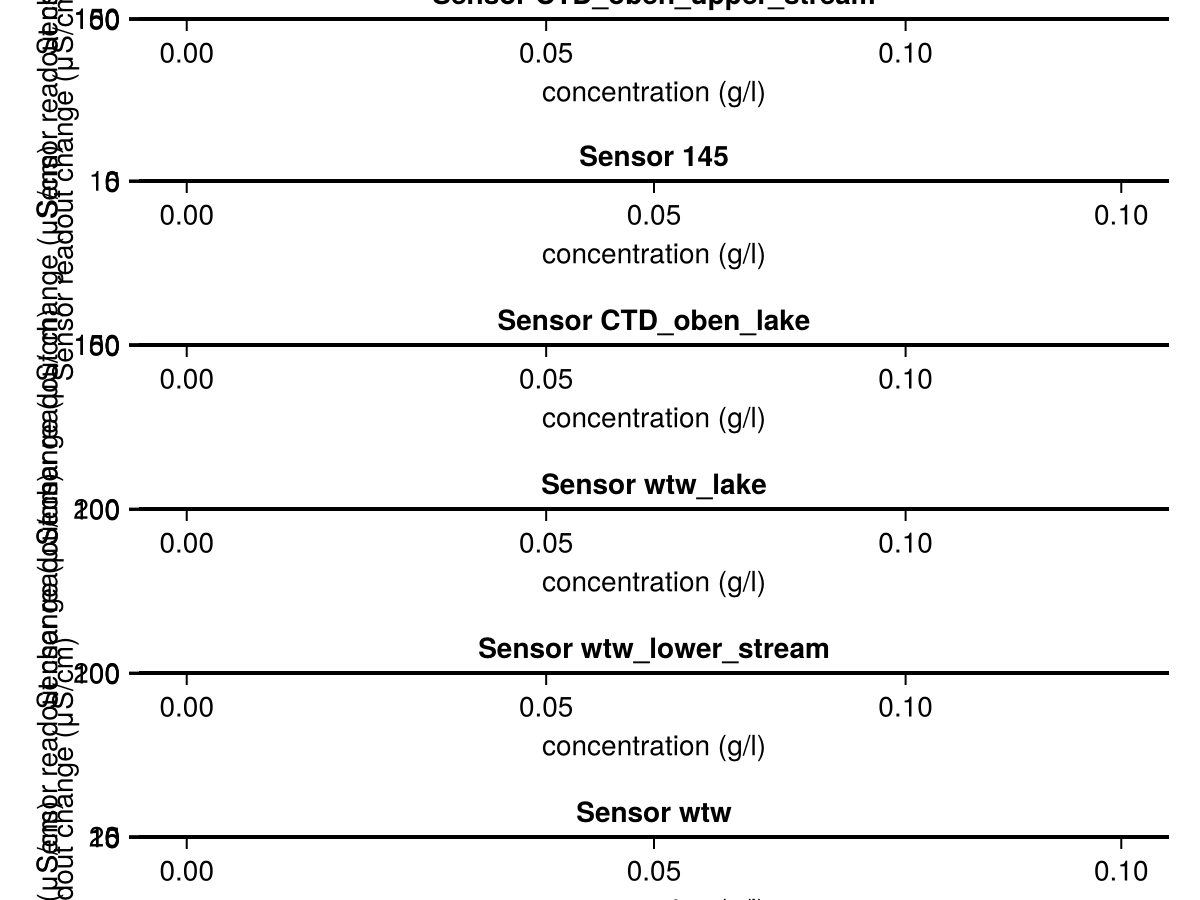

In [5]:
# # Calibration
#
# The aim is to find the slope between sensor readout (μS/cm) and concentration (g/l) for each sensor

bucketsize = 1.0 # calibration bucket size in liters
solution_conc = 10.0 # calibration solution concentration (g/l)

# Total calibration ml solution vs sensor readout (μS/cm) for each sensor
# Example from 2021:

calibrations = Dict(## For 1g/l concentration:
                    
                        
                    ################## upper stream #####################
                    :wtw_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.8
                            1 4.5
                            2 6.7
                            5 13.6
                            10 24.2]],

                    :CTD_oben_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.9
                            1 1.9
                            2 2.9
                            5 5.9
                            10 12.3]],
                            
                    :CTD_unten_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.8
                            1 1.7
                            2 2.6
                            5 5.8
                            10 12.2]],



                        
                    ################## lower stream ######################       
                    :wtw_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.5
                            1 4.8
                            2 6.2
                            5 14.0
                            10 24.5]],

                    :CTD_oben_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.8
                            1 2.0
                            2 3.0
                            5 6.1
                            10 12.0]],
  
                  
                    :CTD_unten_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.6
                            1 1.8
                            2 2.7
                            5 5.9
                            10 12.2]],

                        

                    ###################### lake ##########################       
                    :wtw=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 4.4
                            1 7.3
                            2 9.5
                            5 16.5
                            10 26.7]],
                            
                    309=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.9
                            1 3.2
                            2 4.2
                            5 7.6
                            10 14.3]],
                            
                    145=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.7
                            1 2.9
                            2 3.9
                            5 7.5
                            10 14.2]],



                    
                    ## For 10g/l concentration:
                    ################## upper stream #####################
                    
                    :wtw_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.5
                            2 46.2
                            4 90.7 
                            9 197.0
                            13 283.0]],

                    
                    :CTD_oben_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.9
                            2 26.8
                            4 51.6
                            9 108.6
                            13 156.0]],
                            
                    :CTD_unten_upper_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.7
                            2 26.3
                            4 51.6
                            9 109.2
                            13 156.4]],
                            


                    ################## lower stream ######################       
                    
                    :wtw_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.4
                            2 46.3
                            4 90.9
                            9 197.6
                            13 282.0]],

                    :CTD_oben_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 2.5
                            2 26.2
                            4 51.3
                            9 108.3
                            13 156.5]],
                            
                    :CTD_unten_lower_stream=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 0.6
                            2 26.8
                            4 51.8
                            9 110.0
                            13 155.9]],
                            


                    ###################### lake ##########################                                   
                   
                    :wtw_lake=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 4.3
                            2 47.5
                            4 90.8
                            9 194.3
                            13 280.0]],

                    :CTD_oben_lake=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.9
                            2 28.7
                            4 54.1
                            9 113.0
                            13 160.9]],


                    :CTD_unten_lake=>[ ## note that sensors non-numeric ID are best written as a :symbol
                           [0 1.7
                            2 27.8
                            4 54.5
                            9 113.0
                            13 162.4]],


                            


                    ## add more:
                    ## 049=>[],
                    ## :someother=>[], ## etc
                    )

# Convert ml solution added to concentration

"""
Converts ml added to bucket to a concentration (g/l == kg/m^3).

Input:

- ml -- how many mililiters were added
- solution_conc -- the concentration of the calibration solution (kg/m^3 == g/l)
- bucketsize -- the size of the bucket/bottle to which the solution was added (l)

Output:

- concentration (kg/m^3 == g/l)
"""
function ml_to_concentration(ml, solution_conc, bucketsize)
    mass = ml/1e3 * solution_conc # salt mass added to bucket (g)
    return mass/bucketsize # concentration in g/l (== kg/m^3)
end
# An example, convert to concentration (g/l):
#ml_to_concentration(calibrations[:wtw_upper_stream][1][:,1], solution_conc, bucketsize)

# Now fit a linear function to it.  The function is pre-defined in the file helper_functions.jl with
# name `fit_calibration`.
using NBInclude
@nbinclude("helper_functions.ipynb")

delta_cond2conc = Dict(a[1] => fit_calibration(bucketsize, solution_conc, a[2]...) for a in pairs(calibrations))



# Plot them

#using GLMakie
#Makie.inline!(false)
## Note if you want a zoom-able plot opening in a new window do:
## Makie.inline!(false)
## to go back to in-line plots set it true again
using CairoMakie

fig = Figure()
for (i,sens) in enumerate(keys(delta_cond2conc))
    ax = Axis(fig[i, 1], title="Sensor $sens",
        xlabel="concentration (g/l)",
        ylabel="Sensor readout change (μS/cm)")
    delta_fn = delta_cond2conc[sens]
    calis = calibrations[sens]
    
    ## scatter plots (x,y) points
    maxreadout = 0
    for cali in calis
        conc = ml_to_concentration(cali[:,1], solution_conc, bucketsize)
        yvals = cali[:,2] .- cali[1,2]
        maxreadout = max(maxreadout, maximum(yvals))

        #=xpos = sum(conc) / length(conc)
        ypos = sum(yvals) / length(yvals)
        text!(ax, xpos, ypos, text = "a = $(delta_cond2conc[sens])")
=#
        scatter!(conc, cali[:,2].-cali[1,2],
                 label="Calibration 1")
    end

    ## Now plot the line of best fit:
    readouts = 0:maxreadout
    ## (lines! plots a line)
    lines!(delta_fn(readouts), readouts, label="line of best fit")
end
fig


# Save them as files:

# mkpath("../plots")
# save("../plots/calibration.png", fig) ## to save this figure to a file, useful for your presentation

#md save("../docs/calibration.png", fig) #hide
#md # ![](calibration.png)